# Results

In [1]:
%run mylib.py
(data, X, y)=loadXy(verbose=False)

## Build a DummyClassifier as baseline

# TO BE DONE

## Load models and evaluate them

Read file with loadModel() function and use the score() method

Store result in array, append array to global on

> Note: As the model loaded might be a keras.Sequential object, the function uses a *try{} / catch* block to evaluate accuracy of models either by using the score() function and the evaluate() one for *keras.Sequential()* objects.

In [7]:

model_list=['knn', 'decision-tree', 'logistic', 'random-forest', 'svm-linear', 'svm-rbf', 'cnn']
models_score=[]

for i in model_list:
    model=loadModel(i)
    try:
        accuracy=model.score(X['test'], y['test'])
    except:
        accuracy=model.evaluate(data['test']['data'], data['test']['labels'])[1]
    finally:
        accuracy=accuracy*100
    print("  {} - Accuracy on test dataset: {:.1f}%\n".format(i, accuracy))
    models_score.append([i, accuracy])
    


Loading model from  model-knn.sav
Model loaded using pickle()
  knn - Accuracy on test dataset: 92.2%

Loading model from  model-decision-tree.sav
Model loaded using pickle()
  decision-tree - Accuracy on test dataset: 88.2%

Loading model from  model-logistic.sav
Model loaded using pickle()
  logistic - Accuracy on test dataset: 96.1%

Loading model from  model-random-forest.sav
Model loaded using pickle()
  random-forest - Accuracy on test dataset: 92.2%

Loading model from  model-svm-linear.sav
Model loaded using pickle()
  svm-linear - Accuracy on test dataset: 96.1%

Loading model from  model-svm-rbf.sav
Model loaded using pickle()
  svm-rbf - Accuracy on test dataset: 96.1%

Loading model from  model-cnn.sav
Model loaded using keras.models.load_model()
51/51 [==============================] - 1s 12ms/step
  cnn - Accuracy on test dataset: 54.9%



## Display results


### As a Panda DataFrame

Build a panda dataFrame and display it

In [8]:
import pandas as pd

compare_df=pd.DataFrame(models_score, columns=['Model', 'Score'])

compare_df



,Model,Score
0,knn,92.156863
1,decision-tree,88.235294
2,logistic,96.078431
3,random-forest,92.156863
4,svm-linear,96.078431
5,svm-rbf,96.078431
6,cnn,54.901961


### As a bar graph

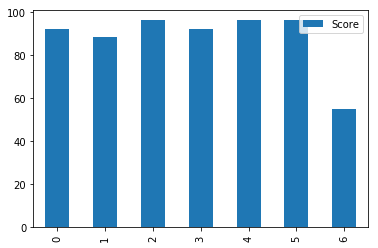

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


compare_df[['Model', 'Score']].plot.bar()
plt.show()